# Welcome to the [Tensor2Tensor](https://github.com/tensorflow/tensor2tensor) Colab

Tensor2Tensor, or T2T for short, is a library of deep learning models and datasets designed to make deep learning more accessible and [accelerate ML research](https://research.googleblog.com/2017/06/accelerating-deep-learning-research.html). T2T is actively used and maintained by researchers and engineers within the [Google Brain team](https://research.google.com/teams/brain/) and a community of users. This colab shows you some datasets we have in T2T, how to download and use them, some models we have, how to download pre-trained models and use them, and how to create and train your own models.

In [1]:
#@title
# Copyright 2018 Google LLC.

# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at

# https://www.apache.org/licenses/LICENSE-2.0

# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [4]:
# Install deps

In [1]:
# Imports we need.
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import collections

from tensor2tensor import models
from tensor2tensor import problems
from tensor2tensor.layers import common_layers
from tensor2tensor.utils import trainer_lib
from tensor2tensor.utils import t2t_model
from tensor2tensor.utils import registry
from tensor2tensor.utils import metrics

# Enable TF Eager execution
tfe = tf.contrib.eager
tfe.enable_eager_execution()

# Other setup
Modes = tf.estimator.ModeKeys

# Setup some directories
data_dir = os.path.join('.', 'data')
tmp_dir = os.path.join('.', "tmp")
train_dir = os.path.join('.',"train")
checkpoint_dir = os.path.join('.', "checkpoints")
tf.gfile.MakeDirs(data_dir)
tf.gfile.MakeDirs(tmp_dir)
tf.gfile.MakeDirs(train_dir)
tf.gfile.MakeDirs(checkpoint_dir)
gs_data_dir = os.path.join('.', "tensor2tensor-data")
gs_ckpt_dir = os.path.join('.', "tensor2tensor-checkpoints/")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensor2tensor/data_generators/video_generated.py:33: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/traitlets/config/app

# Download MNIST and inspect it

In [3]:
# A Problem is a dataset together with some fixed pre-processing.
# It could be a translation dataset with a specific tokenization,
# or an image dataset with a specific resolution.
#
# There are many problems available in Tensor2Tensor
problems.available()

['algorithmic_addition_binary40',
 'algorithmic_addition_decimal40',
 'algorithmic_cipher_shift200',
 'algorithmic_cipher_shift5',
 'algorithmic_cipher_vigenere200',
 'algorithmic_cipher_vigenere5',
 'algorithmic_identity_binary40',
 'algorithmic_identity_decimal40',
 'algorithmic_multiplication_binary40',
 'algorithmic_multiplication_decimal40',
 'algorithmic_reverse_binary40',
 'algorithmic_reverse_binary40_test',
 'algorithmic_reverse_decimal40',
 'algorithmic_reverse_nlplike32k',
 'algorithmic_reverse_nlplike8k',
 'algorithmic_shift_decimal40',
 'algorithmic_sort_problem',
 'audio_timit_characters_tune',
 'audio_timit_tokens8k_test',
 'audio_timit_tokens8k_tune',
 'babi_qa_concat_all_tasks_10k',
 'babi_qa_concat_all_tasks_1k',
 'babi_qa_concat_task10_10k',
 'babi_qa_concat_task10_1k',
 'babi_qa_concat_task11_10k',
 'babi_qa_concat_task11_1k',
 'babi_qa_concat_task12_10k',
 'babi_qa_concat_task12_1k',
 'babi_qa_concat_task13_10k',
 'babi_qa_concat_task13_1k',
 'babi_qa_concat_task14

In [5]:
# Fetch the MNIST problem
mnist_problem = problems.problem("image_mnist")
# The generate_data method of a problem will download data and process it into
# a standard format ready for training and evaluation.
mnist_problem.generate_data(data_dir, tmp_dir)

INFO:tensorflow:Not downloading, file already found: ./tmp/train-images-idx3-ubyte.gz


INFO:tensorflow:Not downloading, file already found: ./tmp/train-labels-idx1-ubyte.gz


INFO:tensorflow:Not downloading, file already found: ./tmp/t10k-images-idx3-ubyte.gz


INFO:tensorflow:Not downloading, file already found: ./tmp/t10k-labels-idx1-ubyte.gz


INFO:tensorflow:Not downloading, file already found: ./tmp/train-images-idx3-ubyte.gz


INFO:tensorflow:Not downloading, file already found: ./tmp/train-labels-idx1-ubyte.gz


INFO:tensorflow:Not downloading, file already found: ./tmp/t10k-images-idx3-ubyte.gz


INFO:tensorflow:Not downloading, file already found: ./tmp/t10k-labels-idx1-ubyte.gz


INFO:tensorflow:Skipping generator because outputs files exists at ['./data/image_mnist-unshuffled-train-00000-of-00010', './data/image_mnist-unshuffled-train-00001-of-00010', './data/image_mnist-unshuffled-train-00002-of-00010', './data/image_mnist-unshuffled-train-00003-of-00010', './data/image_mnist-unshuffled-train-00004-of-00010', './data/image_mnist-unshuffled-train-00005-of-00010', './data/image_mnist-unshuffled-train-00006-of-00010', './data/image_mnist-unshuffled-train-00007-of-00010', './data/image_mnist-unshuffled-train-00008-of-00010', './data/image_mnist-unshuffled-train-00009-of-00010']


INFO:tensorflow:Skipping generator because outputs files exists at ['./data/image_mnist-unshuffled-dev-00000-of-00001']


INFO:tensorflow:Skipping shuffle because output files exist


INFO:tensorflow:Reading data files from ./data/image_mnist-train*


INFO:tensorflow:partition: 0 num_data_files: 10


Label: 8


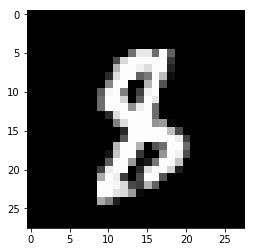

In [7]:
# Now let's see the training MNIST data as Tensors.
mnist_example = tfe.Iterator(mnist_problem.dataset(Modes.TRAIN, data_dir)).next()
image = mnist_example["inputs"]
label = mnist_example["targets"]

plt.imshow(image.numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap('gray'))
print("Label: %d" % label.numpy())

# Translate from English to German with a pre-trained model

In [8]:
# Fetch the problem
ende_problem = problems.problem("translate_ende_wmt32k")

# Copy the vocab file locally so we can encode inputs and decode model outputs
# All vocabs are stored on GCS
vocab_name = "vocab.translate_ende_wmt32k.32768.subwords"
vocab_file = os.path.join(gs_data_dir, vocab_name)
!gsutil cp {vocab_file} {data_dir}

# Get the encoders from the problem
encoders = ende_problem.feature_encoders(data_dir)

# Setup helper functions for encoding and decoding
def encode(input_str, output_str=None):
  """Input str to features dict, ready for inference"""
  inputs = encoders["inputs"].encode(input_str) + [1]  # add EOS id
  batch_inputs = tf.reshape(inputs, [1, -1, 1])  # Make it 3D.
  return {"inputs": batch_inputs}

def decode(integers):
  """List of ints to str"""
  integers = list(np.squeeze(integers))
  if 1 in integers:
    integers = integers[:integers.index(1)]
  return encoders["inputs"].decode(np.squeeze(integers))

/bin/sh: gsutil: command not found


ValueError: File ./data/vocab.translate_ende_wmt32k.32768.subwords not found

In [0]:
# # Generate and view the data
# # This cell is commented out because WMT data generation can take hours

# ende_problem.generate_data(data_dir, tmp_dir)
# example = tfe.Iterator(ende_problem.dataset(Modes.TRAIN, data_dir)).next()
# inputs = [int(x) for x in example["inputs"].numpy()] # Cast to ints.
# targets = [int(x) for x in example["targets"].numpy()] # Cast to ints.



# # Example inputs as int-tensor.
# print("Inputs, encoded:")
# print(inputs)
# print("Inputs, decoded:")
# # Example inputs as a sentence.
# print(decode(inputs))
# # Example targets as int-tensor.
# print("Targets, encoded:")
# print(targets)
# # Example targets as a sentence.
# print("Targets, decoded:")
# print(decode(targets))

In [0]:
# There are many models available in Tensor2Tensor
registry.list_models()

['resnet50',
 'lstm_seq2seq',
 'transformer_encoder',
 'attention_lm',
 'vanilla_gan',
 'transformer',
 'gene_expression_conv',
 'transformer_moe',
 'attention_lm_moe',
 'transformer_revnet',
 'lstm_seq2seq_attention',
 'shake_shake',
 'transformer_ae',
 'diagonal_neural_gpu',
 'xception',
 'aligned',
 'multi_model',
 'neural_gpu',
 'slice_net',
 'byte_net',
 'cycle_gan',
 'transformer_sketch',
 'blue_net']

In [0]:
# Create hparams and the model
model_name = "transformer"
hparams_set = "transformer_base"

hparams = trainer_lib.create_hparams(hparams_set, data_dir=data_dir, problem_name="translate_ende_wmt32k")

# NOTE: Only create the model once when restoring from a checkpoint; it's a
# Layer and so subsequent instantiations will have different variable scopes
# that will not match the checkpoint.
translate_model = registry.model(model_name)(hparams, Modes.EVAL)

In [0]:
# Copy the pretrained checkpoint locally
ckpt_name = "transformer_ende_test"
gs_ckpt = os.path.join(gs_ckpt_dir, ckpt_name)
!gsutil -q cp -R {gs_ckpt} {checkpoint_dir}
ckpt_path = tf.train.latest_checkpoint(os.path.join(checkpoint_dir, ckpt_name))
ckpt_path

u'/content/t2t/checkpoints/transformer_ende_test/model.ckpt-350855'

In [0]:
# Restore and translate!
def translate(inputs):
  encoded_inputs = encode(inputs)
  with tfe.restore_variables_on_create(ckpt_path):
    model_output = translate_model.infer(encoded_inputs)["outputs"]
  return decode(model_output)

inputs = "The animal didn't cross the street because it was too tired"
outputs = translate(inputs)

print("Inputs: %s" % inputs)
print("Outputs: %s" % outputs)

INFO:tensorflow:Greedy Decoding
Inputs: The animal didn't cross the street because it was too tired
Outputs: Das Tier überquerte die Straße nicht, weil es zu müde war, weil es zu müde war.


## Attention Viz Utils

In [2]:
from tensor2tensor.visualization import attention
from tensor2tensor.data_generators import text_encoder

SIZE = 35

def encode_eval(input_str, output_str):
  inputs = tf.reshape(encoders["inputs"].encode(input_str) + [1], [1, -1, 1, 1])  # Make it 3D.
  outputs = tf.reshape(encoders["inputs"].encode(output_str) + [1], [1, -1, 1, 1])  # Make it 3D.
  return {"inputs": inputs, "targets": outputs}

def get_att_mats():
  enc_atts = []
  dec_atts = []
  encdec_atts = []

  for i in range(hparams.num_hidden_layers):
    enc_att = translate_model.attention_weights[
      "transformer/body/encoder/layer_%i/self_attention/multihead_attention/dot_product_attention" % i][0]
    dec_att = translate_model.attention_weights[
      "transformer/body/decoder/layer_%i/self_attention/multihead_attention/dot_product_attention" % i][0]
    encdec_att = translate_model.attention_weights[
      "transformer/body/decoder/layer_%i/encdec_attention/multihead_attention/dot_product_attention" % i][0]
    enc_atts.append(resize(enc_att))
    dec_atts.append(resize(dec_att))
    encdec_atts.append(resize(encdec_att))
  return enc_atts, dec_atts, encdec_atts

def resize(np_mat):
  # Sum across heads
  np_mat = np_mat[:, :SIZE, :SIZE]
  row_sums = np.sum(np_mat, axis=0)
  # Normalize
  layer_mat = np_mat / row_sums[np.newaxis, :]
  lsh = layer_mat.shape
  # Add extra dim for viz code to work.
  layer_mat = np.reshape(layer_mat, (1, lsh[0], lsh[1], lsh[2]))
  return layer_mat

def to_tokens(ids):
  ids = np.squeeze(ids)
  subtokenizer = hparams.problem_hparams.vocabulary['targets']
  tokens = []
  for _id in ids:
    if _id == 0:
      tokens.append('<PAD>')
    elif _id == 1:
      tokens.append('<EOS>')
    elif _id == -1:
      tokens.append('<NULL>')
    else:
        tokens.append(subtokenizer._subtoken_id_to_subtoken_string(_id))
  return tokens

In [3]:
def call_html():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              "d3": "https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.8/d3.min",
              jquery: '//ajax.googleapis.com/ajax/libs/jquery/2.0.0/jquery.min',
            },
          });
        </script>
        '''))

## Display Attention

In [4]:
# Convert inputs and outputs to subwords
inp_text = to_tokens(encoders["inputs"].encode(inputs))
out_text = to_tokens(encoders["inputs"].encode(outputs))

# Run eval to collect attention weights
example = encode_eval(inputs, outputs)
with tfe.restore_variables_on_create(tf.train.latest_checkpoint(checkpoint_dir)):
  translate_model.set_mode(Modes.EVAL)
  translate_model(example)
# Get normalized attention weights for each layer
enc_atts, dec_atts, encdec_atts = get_att_mats()

call_html()
attention.show(inp_text, out_text, enc_atts, dec_atts, encdec_atts)

NameError: name 'encoders' is not defined

# Train a custom model on MNIST

In [5]:
# Create your own model

class MySimpleModel(t2t_model.T2TModel):

  def body(self, features):
    inputs = features["inputs"]
    filters = self.hparams.hidden_size
    h1 = tf.layers.conv2d(inputs, filters,
                          kernel_size=(5, 5), strides=(2, 2))
    h2 = tf.layers.conv2d(tf.nn.relu(h1), filters,
                          kernel_size=(5, 5), strides=(2, 2))
    return tf.layers.conv2d(tf.nn.relu(h2), filters,
                            kernel_size=(3, 3))

hparams = trainer_lib.create_hparams("basic_1", data_dir=data_dir, problem_name="image_mnist")
hparams.hidden_size = 64
model = MySimpleModel(hparams, Modes.TRAIN)

NameError: name 't2t_model' is not defined

In [6]:
# Prepare for the training loop

# In Eager mode, opt.minimize must be passed a loss function wrapped with
# implicit_value_and_gradients
@tfe.implicit_value_and_gradients
def loss_fn(features):
  _, losses = model(features)
  return losses["training"]

# Setup the training data
BATCH_SIZE = 128
mnist_train_dataset = mnist_problem.dataset(Modes.TRAIN, data_dir)
mnist_train_dataset = mnist_train_dataset.repeat(None).batch(BATCH_SIZE)

optimizer = tf.train.AdamOptimizer()

NameError: name 'tfe' is not defined

In [7]:
# Train
NUM_STEPS = 500

for count, example in enumerate(tfe.Iterator(mnist_train_dataset)):
  example["targets"] = tf.reshape(example["targets"], [BATCH_SIZE, 1, 1, 1])  # Make it 4D.
  loss, gv = loss_fn(example)
  optimizer.apply_gradients(gv)

  if count % 50 == 0:
    print("Step: %d, Loss: %.3f" % (count, loss.numpy()))
  if count >= NUM_STEPS:
    break

NameError: name 'tfe' is not defined

In [8]:
model.set_mode(Modes.EVAL)
mnist_eval_dataset = mnist_problem.dataset(Modes.EVAL, data_dir)

# Create eval metric accumulators for accuracy (ACC) and accuracy in
# top 5 (ACC_TOP5)
metrics_accum, metrics_result = metrics.create_eager_metrics(
    [metrics.Metrics.ACC, metrics.Metrics.ACC_TOP5])

for count, example in enumerate(tfe.Iterator(mnist_eval_dataset)):
  if count >= 200:
    break

  # Make the inputs and targets 4D
  example["inputs"] = tf.reshape(example["inputs"], [1, 28, 28, 1])
  example["targets"] = tf.reshape(example["targets"], [1, 1, 1, 1])

  # Call the model
  predictions, _ = model(example)

  # Compute and accumulate metrics
  metrics_accum(predictions, example["targets"])

# Print out the averaged metric values on the eval data
for name, val in metrics_result().items():
  print("%s: %.2f" % (name, val))

NameError: name 'model' is not defined